## Supervised Learning: Challenge

In this challenge, we will try to predict credit card fraud.

Download the data from [here](https://drive.google.com/file/d/1FCQY1SiWIjh_ME6Wtb3FG8Y1sKoRwAUc/view?usp=sharing). The data is originally from a [Kaggle Competition](https://www.kaggle.com/mlg-ulb/creditcardfraud).

The dataset contains transactions made by credit cards within two days in September 2013 by European cardholders.  Where **we have 492 occurrences of fraud out of the total of 284,807 transactions**. This dataset is highly unbalanced, with the positive class (frauds) account for 0.172% of all transactions.

____________________
### **Challenge:** Identify fraudulent credit card transactions.

Features V1, V2, … V28 are the principal components obtained with PCA. The only features that are not transformed with PCA are `'Time'` and `'Amount'`.  

- The feature `'Time'` contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature `'Amount'` is the transaction amount; this feature can be used for example-dependant cost-sensitive learning. 
- The feature `'Class'` is the target variable, and it takes the value of 1 in case of fraud and 0 otherwise.

> #### Warning
> There is a huge class imbalance ratio, so we need to be careful when evaluating. It might be better to use the method `.predict_proba()` with a custom cut-off to search for fraudulent transactions.

In [26]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [2]:
df  = pd.read_csv("data/creditcard.csv")

In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# Preprocessing thoughts:
# Scale time and amount? see hints from kaggle 
# need to split out 
# SMOTE? sythecit minority oversampling techniue**

# try random forests, svm, niave bayes

In [4]:
df.shape

(284807, 31)

In [5]:
X=df.iloc[:,:-1]
y=df.Class

In [6]:
y.shape

(284807,)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

# this doesn't stick - reassign?

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

### Naive Bayes

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=88)

In [16]:
from sklearn import naive_bayes
clf = naive_bayes.GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [19]:
y_proba_nb = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

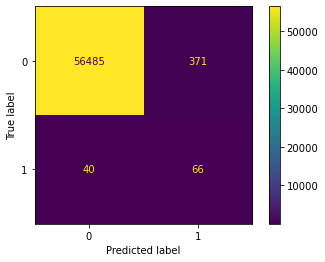

In [20]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()

plt.show()

In [27]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.998139110284049
Precision: 0.0
Recall: 0.0


/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [21]:
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

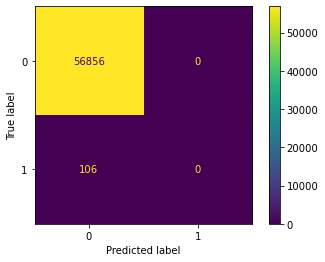

In [22]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()

plt.show()

In [28]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.998139110284049
Precision: 0.0
Recall: 0.0


/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Maybe choose a different kernel or grid search or try under/ over sampling
# https://www.kaggle.com/mlg-ulb/creditcardfraud/discussion/277570
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets this has good explaination fo ways to explore imbalance

# (t-SNE seems to be the best one - come back once we cover in class)